In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_orig = pd.read_csv('../MA_PREDICTOR/data/ma_detailed_data_car.csv', parse_dates=['announcement_date'])

FileNotFoundError: [Errno 2] No such file or directory: '../../MA_PREDICTOR/data/ma_detailed_data_car_clean.csv'

In [20]:
data_orig.columns

Index(['announcement_date', 'target_status', 'acquisition_count',
       'shares_at_announcement', 'shares_acquired', 'consideration_offered',
       'bidder_count', 'month', 'rel_deal_value', 'cross_border',
       'relatedness', 'economic_sector_ac', 'business_sector_ac',
       'economic_sector_target', 'business_sector_target', 'cluster_category',
       'a_fin_adv_count', 't_fin_adv_count', 'car_1', 'car_3', 'car_5',
       'car_10'],
      dtype='object')

In [21]:
# Defining which columns should be considered in detailed investigations
columns_to_inspect = [
    'deal_value',
    'acquiror_total_assets',
    'acquiror_name',
    'target_name',
    'acquiror_industry',
    'target_industry',
    'shares_acquired',
    'acquisition_technique',
    'purpose',
    'car'
]

# Outliers

## Detecting outliers (already removed in datacleaning)

In [23]:
data_orig

,announcement_date,target_status,acquisition_count,shares_at_announcement,shares_acquired,consideration_offered,bidder_count,month,rel_deal_value,cross_border,...,business_sector_ac,economic_sector_target,business_sector_target,cluster_category,a_fin_adv_count,t_fin_adv_count,car_1,car_3,car_5,car_10
0,2005-01-01,others,15,no,full,Cash,1,1,0.003797,cross_border,...,Energy - Fossil Fuels,Energy,Energy - Fossil Fuels,divestiture,0,0,Unknown,Unknown,Unknown,Unknown
1,2005-01-04,public,23,no,full,Cash,1,4,0.024922,cross_border,...,Food & Drug Retailing,Industrials,Transportation,divestiture,1,0,-0.0093619289839946,0.0013080420118526,0.0180408936558373,0.0564284266231462
2,2005-01-10,others,5,no,full,Cash,1,10,0.531360,cross_border,...,Personal & Household Products & Services,Consumer Non-Cyclicals,Personal & Household Products & Services,divestiture,0,0,Unknown,Unknown,Unknown,Unknown
3,2005-01-11,others,12,no,full,Other,1,11,0.137946,cross_border,...,Energy - Fossil Fuels,Energy,Energy - Fossil Fuels,asset_driven_op,0,0,Unknown,Unknown,Unknown,Unknown
4,2005-01-11,public,18,no,full,Other,1,11,0.008012,cross_border,...,Banking & Investment Services,Financials,Banking & Investment Services,asset_driven_op,0,0,-0.0112488669618986,0.0044535109881448,0.0126964279022807,0.0448068359820681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,2021-07-19,others,6,no,full,Other,1,7,0.270094,cross_border,...,Software & IT Services,Technology,Software & IT Services,divestiture,0,0,0.068755013733709,0.1101121177284621,0.1027257359908367,0.1209718965833321
5033,2021-07-28,others,21,no,full,Cash,1,7,0.232595,cross_border,...,Applied Resources,Consumer Cyclicals,Cyclical Consumer Services,divestiture,1,0,0.0221855022604767,0.0414868602792537,0.0414868602792537,0.0165032311399494
5034,2021-08-05,others,1,no,full,Other,1,5,0.227683,cross_border,...,Pharmaceuticals & Medical Research,Healthcare,Pharmaceuticals & Medical Research,asset_driven_op,0,0,Unknown,Unknown,Unknown,Unknown
5035,2021-08-13,others,1,no,full,Other,1,8,0.372376,cross_border,...,Pharmaceuticals & Medical Research,Healthcare,Pharmaceuticals & Medical Research,divestiture,0,0,0.045618799803836,0.1466130455171906,0.2312344163664345,0.2907621633430807


In [22]:
sns.catplot(data=data_orig, y='car_10', kind='box',
           #showfliers=False
           );

TypeError: Vertical orientation requires numeric `y` variable.

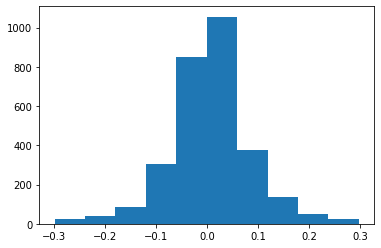

In [16]:
plt.hist(data_orig.car_10);

## Excluding outliers

In [8]:
# Defining outlier threshold
car_thresh = 1

# Filtering outliers
data = data_orig[(abs(data_orig.car) < car_thresh)]

In [9]:
(len(data_orig) - len(data)) / len(data_orig)

0.003003003003003003

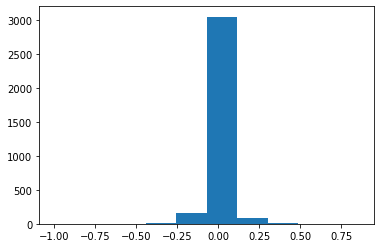

In [10]:
plt.hist(data.car);

# deal_value

## Absolute

In [11]:
data.deal_value.describe()

count     3320.000000
mean      1300.103810
std       4557.812864
min          0.070000
25%         61.590000
50%        258.165000
75%        800.000000
max      79406.460000
Name: deal_value, dtype: float64

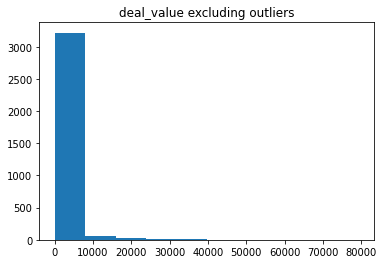

In [12]:
plt.hist(data.deal_value,
         # range=(0,1000)
        )
plt.title('deal_value excluding outliers');

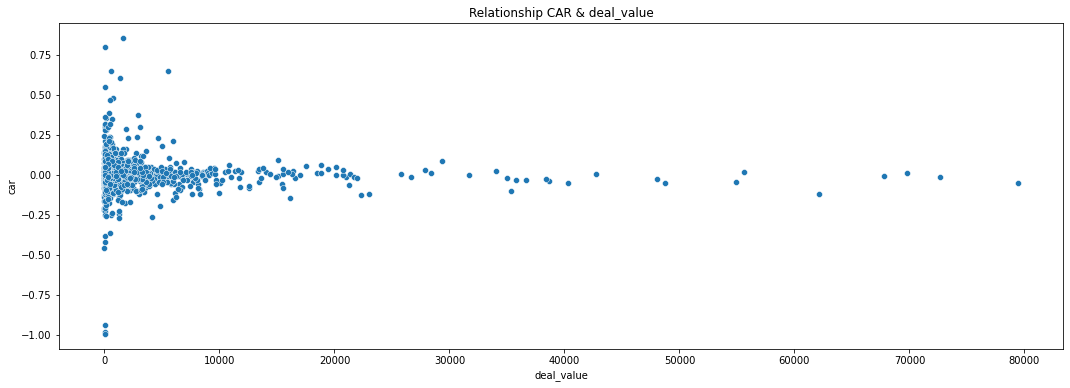

In [13]:
plt.figure(figsize=(18,6))
plt.title("Relationship CAR & deal_value")
sns.scatterplot(data=data, x='deal_value', y='car');

## Relative (tbc with percentage of shares acquired)

In [14]:
data.acquiror_total_assets.value_counts()[0]

1

In [15]:
# Dividing deal value by total assets to retrieve relative (to the size of acquiror) deal value
relative = data.copy()
relative['rel_deal_value'] = data.apply(lambda row:
                                       row.deal_value / row.acquiror_total_assets
                                       if row.acquiror_total_assets # one observation has 0 total assets and
                                       else -1000, # will be filtered out
                                       axis=1)

# Filtering out acquiror_total_assets = 0
relative = relative[relative.rel_deal_value > 0]

In [16]:
relative.rel_deal_value.describe()

count     3319.000000
mean         7.667271
std        286.003307
min          0.000004
25%          0.019882
50%          0.062728
75%          0.205659
max      14804.666667
Name: rel_deal_value, dtype: float64

In [17]:
len(relative[relative.rel_deal_value > 1]) # to see that 184 deals have fishy relative deal size

184

In [18]:
relative[relative.rel_deal_value > 1][columns_to_inspect].sample(5)

,deal_value,acquiror_total_assets,acquiror_name,target_name,acquiror_industry,target_industry,shares_acquired,acquisition_technique,purpose,car
2732,4279.15,2954.13,Pebblebrook Hotel Trust,LaSalle Hotel Properties,Specialized REITs,Specialized REITs,100.0,Stock Swap|Reverse Takeover|Unsolicited Deal,"Other|Create synergies, eliminate duplicate se...",0.038919
148,1.05,0.61,PTS Inc,Disability Access Consultants Inc,"Medical Equipment, Supplies & Distribution",Business Support Services,100.0,Divestiture,General strategy to take advantage of sound in...,-0.126790
2760,1.95,0.99,Vystar Corp,UV Flu Technologies Inc,Tires & Rubber Products,Electrical Components & Equipment,100.0,Stock Swap,Strengthen operations,-0.381380
2997,2500.69,1781.94,Exact Sciences Corp,Genomic Health Inc,Biotechnology & Medical Research,Healthcare Facilities & Services,100.0,Collar|Stock Swap|Rumored Deal,Increase shareholder value|Strengthen existing...,0.012937
3140,1391.47,790.89,Invitae Corp,ArcherDX Inc,IT Services & Consulting,Biotechnology & Medical Research,100.0,Financial Acquiror,"Create synergies, eliminate duplicate services...",0.603988


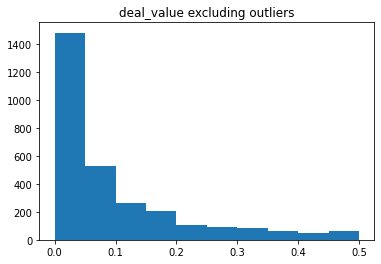

In [19]:
plt.hist(relative.rel_deal_value,
         range=(0,0.5)
        )
plt.title('deal_value excluding outliers');

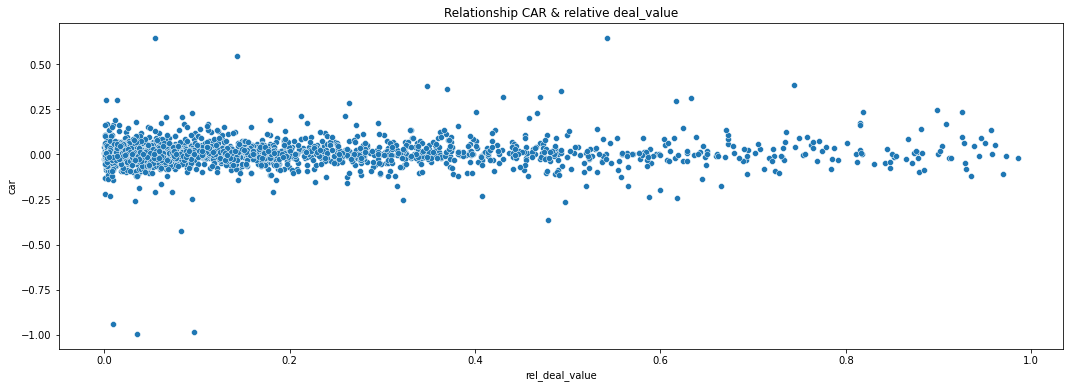

In [20]:
# Defining outlier threshold
thresh = 1

# Scatterplot
plt.figure(figsize=(18,6))
plt.title("Relationship CAR & relative deal_value")
sns.scatterplot(data=relative[relative.rel_deal_value < thresh], x='rel_deal_value', y='car');

# Target exploration

In [21]:
car_explo = data.copy()
classifier = lambda x: 'positive' if x > 0 else 'negative'
car_explo['classifier'] = car_explo.car.apply(classifier)

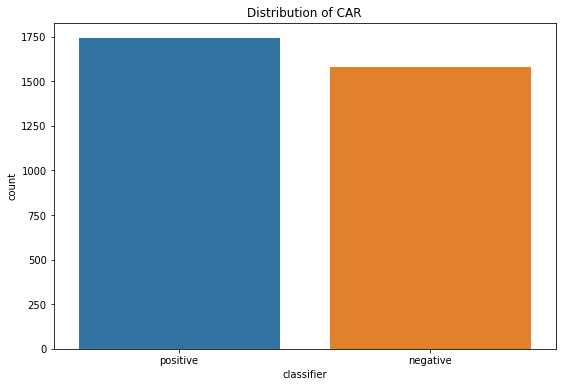

In [22]:
plt.figure(figsize=(9,6))
plt.title("Distribution of CAR")
sns.countplot(x=car_explo.classifier);

# ..._nation

In [23]:
# Creating dataframe with cross-border feature

nation = data[['acquiror_nation', 'target_nation', 'car']].copy()
nation['cross_border'] = nation.apply(lambda row: 'cross_border' if row.acquiror_nation == row.target_nation else 'national', axis=1)

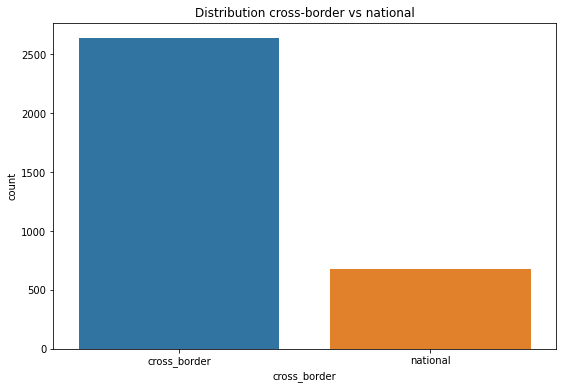

In [24]:
# Distribution

plt.figure(figsize=(9,6))
plt.title("Distribution cross-border vs national")
sns.countplot(x=nation.cross_border);

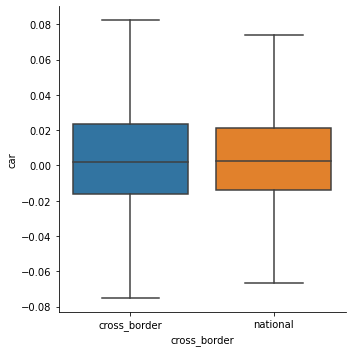

In [25]:
# Impact on target
sns.catplot(data=nation, x='cross_border', y='car', kind='box',
            showfliers=False
           );

# shares_...

In [26]:
# Clustering into full acquisition and not full-acquisition

shares = data[['car']].copy()

# Divide into full (100%) and not full
def full_acqu(x):
    if x != 100:
        return 'not_full'
    return 'full'

shares['acquisition'] = data.apply(lambda row: full_acqu(row.shares_acquired), axis=1)

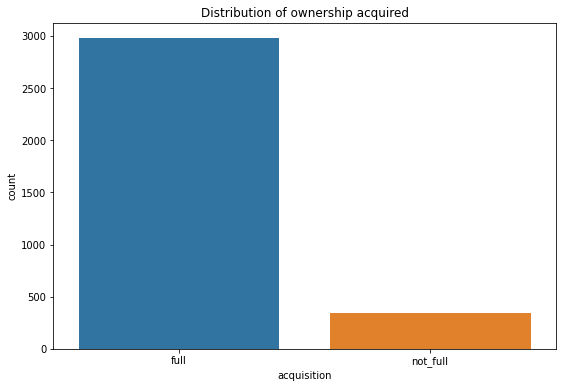

In [27]:
# Distribution

plt.figure(figsize=(9,6))
plt.title("Distribution of ownership acquired")
sns.countplot(x=shares.acquisition);

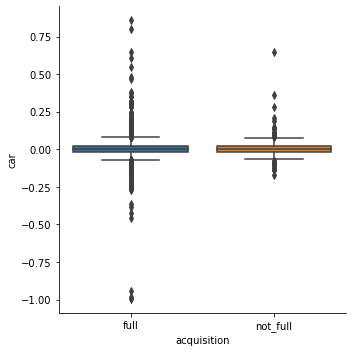

In [28]:
# Impact on target

sns.catplot(data=shares, x='acquisition', y='car', kind='box',
            #showfliers=False
           );

# consideration_offered

In [29]:
# Preprocess

consideration = data[['consideration_offered', 'car']].copy()
# has to be transformed first -> everything that only has cash will be 'cash', rest 'other'

# transform pipes into list of all considerations
list_gen = lambda x: x.split('|')
consideration['consideration_offered'] = consideration.consideration_offered.apply(list_gen)

# Cluster considerations
def cash(considerations):
    
    for consideration in considerations:
        if 'Cash' not in consideration:
            return 'Other'
    return 'Cash'

# Apply
consideration['consideration_offered'] = consideration.apply(lambda row: cash(row.consideration_offered), axis=1)

In [30]:
data.car.describe()

count    3320.000000
mean        0.005172
std         0.069531
min        -0.996250
25%        -0.015647
50%         0.001996
75%         0.022851
max         0.857922
Name: car, dtype: float64

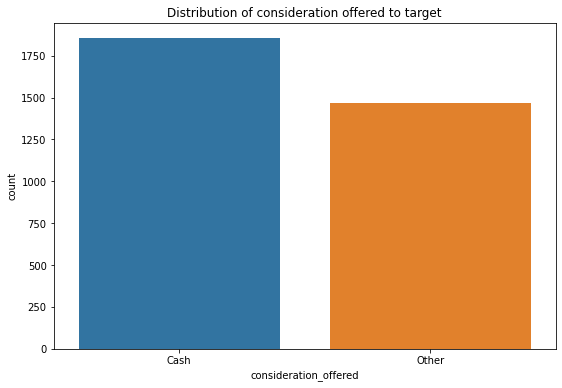

In [31]:
# Distribution
plt.figure(figsize=(9,6))
plt.title("Distribution of consideration offered to target")
sns.countplot(x=consideration.consideration_offered);

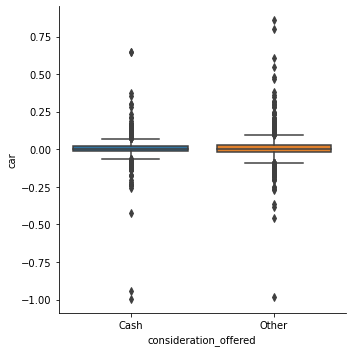

In [32]:
# Impact on target
sns.catplot(data=consideration, x='consideration_offered', y='car', kind='box',
            #showfliers=False
           );

# acquisition_techniques (tbc after Vlad's research)

In [33]:
technique = data[['car']]

In [34]:
# unpack techniques and put them into set
techniques = set()
for index, row in data.iterrows():
    for technique in row.acquisition_technique.split('|'):
        if technique:
            techniques.add(technique)

In [35]:
techniques

{'Acquiror Includes Management',
 'Acquiror Is A White Knight',
 'Acquiror Is An Investor Group',
 'Asset Swap',
 'Auction',
 'Bankruptcy Acquisition',
 'Collar',
 'Concession',
 'Debt Restructuring',
 'Divestiture',
 'Financial Acquiror',
 'Going Private',
 'Institutional Buyout',
 'Internal Reorganization',
 'Joint Venture',
 'Leveraged Buyout',
 'Litigation',
 'Mandatory Offering',
 'Mergerof Equals',
 'Open Market Purchase',
 'Private Tender Offer',
 'Privately Negotiated Purchase',
 'Privatization',
 'Property Acquisition Flag',
 'Proxy Fight',
 'Restructuring',
 'Reverse Morris Trust',
 'Reverse Takeover',
 'Rumored Deal',
 'Sale and Leaseback',
 'Schemeof Arrangement',
 'Secondary Buyout',
 'Stock Swap',
 'Tender Merger',
 'Tender Offer',
 'Three Way Merger',
 'Unsolicited Deal'}

In [36]:
# Define columns that should be excluded (based on research and investigation of deals)

to_exclude = [
    'Open Market Purchase', # 3 deals only
    'Privately Negotiated Purchase', # should only be excluded if target and acquiror name are same
    'Debt Restructuring' # 3 deals, not a merger (shares acquired <10)
]

## Investigation: Fishy techniques

In [104]:
# Further investigation into 'Divestiture' and 'Stock Swap'
investigation = data.copy()

# Transforming pipes into lists of techniques used
list_gen = lambda x: x.split('|')
investigation['acquisition_technique'] = investigation.acquisition_technique.apply(list_gen)

# Cluster considerations
def fishy(techniques):
    
    # Define fishy techniques
    fishy_techniques = [
        'Sale and Leaseback'
    ]
    
    # Label fishy techniques
    for technique in techniques:
        if technique in fishy_techniques:
            return 'fishy'
    return 'ok'

# Apply detector
investigation['red_flag'] = investigation.apply(lambda row: fishy(row.acquisition_technique), axis=1)

In [105]:
# Counting number of occurences
investigation.red_flag.value_counts()

ok       3304
fishy      16
Name: red_flag, dtype: int64

In [106]:
# Filtering out fishy deals
investigation[investigation.red_flag == 'fishy'][columns_to_inspect].sample(10)

,deal_value,acquiror_total_assets,acquiror_name,target_name,acquiror_industry,target_industry,shares_acquired,acquisition_technique,purpose,car
2912,859.00,8843.64,Medical Properties Trust Inc,Healthscope Ltd-Hospital Properties(11),"Real Estate Rental, Development & Operations","Real Estate Rental, Development & Operations",100.0,"[Sale and Leaseback, Property Acquisition Flag...",Strengthen existing operations/expand presence...,-0.030112
315,462.00,14491.87,CapitalSource Inc,Undisclosed Long-Term Care Facilities(77),Banks,Healthcare Facilities & Services,100.0,"[Financial Acquiror, Sale and Leaseback]",Strengthen operations,-0.039873
2908,319.00,4592.94,Uniti Group Inc,Bluebird Network LLC-Fiber Network,"Real Estate Rental, Development & Operations",Integrated Telecommunications Services,100.0,"[Sale and Leaseback, Divestiture]",General strategy to take advantage of sound in...,0.017787
1880,19.00,481.16,Agree Realty Corp,Charter Foods Inc-Taco Bell Restaurants(13),"Real Estate Rental, Development & Operations",Restaurants & Bars,100.0,"[Sale and Leaseback, Divestiture]",Strengthen existing operations/expand presence...,-0.002755
1622,397.58,14122.93,American Tower Corp,"NII Holdings Inc-Tower Sites (1,666),Mexico","Real Estate Rental, Development & Operations",Wireless Telecommunications Services,100.0,"[Sale and Leaseback, Financial Acquiror, Dives...","Create synergies, eliminate duplicate services...",0.065560
683,15.05,399.25,Novamerican Steel Inc,"Chriscott Properties Inc-Real Property,Baie D'...",Iron & Steel,"Real Estate Rental, Development & Operations",100.0,"[Divestiture, Sale and Leaseback]",Strengthen operations,0.000000
217,29.00,2661.60,Ventas Inc,Capital Senior Living Corp- Towne Centre,Real Estate Services,Healthcare Facilities & Services,100.0,"[Sale and Leaseback, Divestiture]",Raise cash through disposal,-0.034084
2977,270.00,6431.23,EPR Properties,Cineworld Group-Plc-Multi-Screen Cinemas(18),Commercial REITs,Leisure & Recreation,100.0,"[Divestiture, Sale and Leaseback]","Increase shareholder value|Create synergies, e...",0.003801
1836,1.00,40.86,Farmland Partners Inc,"Undisclosed Crop Farm,Morrill County,Nebraska","Real Estate Rental, Development & Operations",Fishing & Farming,100.0,[Sale and Leaseback],General strategy to take advantage of sound in...,0.000000
1664,248.93,2254.48,Medical Properties Trust Inc,RHM Klinik-Und Altenheimetriebe GmbH & Co Kg- ...,"Real Estate Rental, Development & Operations",Healthcare Facilities & Services,100.0,"[Sale and Leaseback, Divestiture]",Expand presence in new geographical regions,0.006516


# acquiror_financial_advisor (& target_financial_advisor)

**3 options of impact**:
* acquiror financial advisor (makes most sense, since CAR is measured on acquirors side)
* target financial advisor
* advisors involved in deal

In [40]:
# Missing data in percent, might not need to exclude but used as category e.g., 'unknown' -> no top acquiror
data[['acquiror_financial_advisor', 'target_financial_advisor']].isna().sum() / len(data)

acquiror_financial_advisor    0.475301
target_financial_advisor      0.361446
dtype: float64

In [41]:
adv = data[['acquiror_financial_advisor', 'target_financial_advisor', 'car']].copy()

# Filling up NAs with 'Unknown'
adv.fillna('Unknown', inplace=True)

# unpack advisors and put them into set
advisors = set()
for index, row in adv.iterrows():
    for advisor in row['acquiror_financial_advisor'].split('|'):
        advisors.add(advisor)
    for advisor in row['acquiror_financial_advisor'].split('|'):
        advisors.add(advisor)

**Top 10 M&A advisors sourced from dealroom (https://dealroom.net/blog/biggest-m-a-firms)**

In [42]:
# Defining list of top M&A advisors
base = ['Barclays', 'Bank of America', 'Citi', 'Credit Suisse','Goldman Sachs',
        'JP Morgan', 'Lazard', 'Morgan Stanley', 'Rothschild', 'UBS']

# Adjust advisor's name to dataset (preliminary operation)
top_advisors = []
for advisor in advisors: # iterating through set of advisors
    for top_advisor in base:
        if top_advisor in advisor: # if (base) name of top_advisors is in set append
            top_advisors.append(advisor)
            
top_advisors = sorted(top_advisors)

# Manually investigate top_advisors and append/ remove accordingly
top_advisors.remove('Mitsubishi UFJ Morgan Stanley')

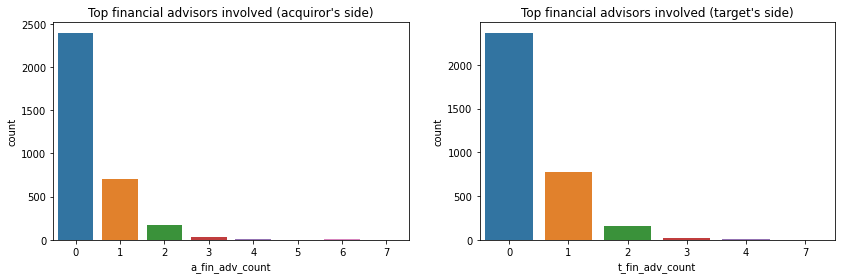

In [43]:
# Find out how many top_advisors were involved in transaction

adv = data[['acquiror_financial_advisor', 'target_financial_advisor', 'car']].copy()

# Filling up NAs with 'Unknown'
adv.fillna('Unknown', inplace=True)

# Features to transform
parties = ['acquiror_financial_advisor', 'target_financial_advisor']

# Transforming advisor pipe(s) into lists to iterate through
list_gen = lambda x: x.split('|')

for party in parties:
    adv[party] = adv[party].apply(list_gen)

# Counting number of top_advisors per deal (acquiror_side)
def counter(advisors):
    count = 0
    for advisor in advisors:
        if advisor in top_advisors:
            count += 1
    return count

# Create new cols for acquiror and target
adv['a_fin_adv_count'] = adv.apply(lambda row: counter(row.acquiror_financial_advisor), axis=1)
adv['t_fin_adv_count'] = adv.apply(lambda row: counter(row.target_financial_advisor), axis=1)

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title("Top financial advisors involved (acquiror's side)")
sns.countplot(x=adv.a_fin_adv_count);

plt.subplot(1, 2, 2)
plt.title("Top financial advisors involved (target's side)")
sns.countplot(x=adv.t_fin_adv_count);

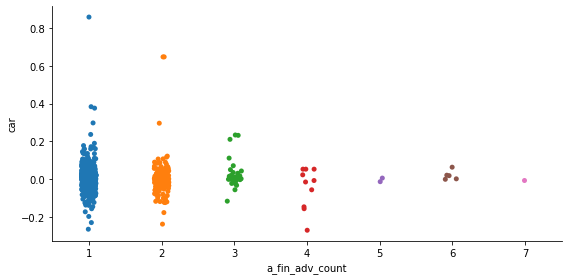

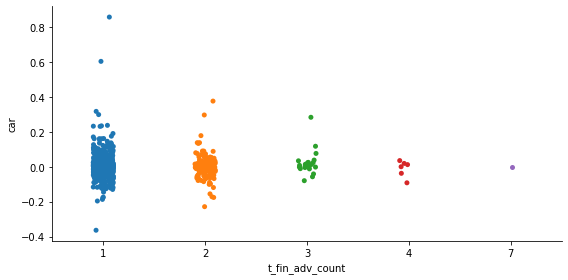

In [44]:
# Exclude 0 -> yes: excl=1, no: excl=0
excl = 1

# acquiror
sns.catplot(data=adv[adv.a_fin_adv_count >= excl], x='a_fin_adv_count', y='car',
            #kind='box',
            height=4, aspect=2);
# target
sns.catplot(data=adv[adv.t_fin_adv_count >= excl], x='t_fin_adv_count', y='car',
            #kind='box',
            height=4, aspect=2);

# purpose

## Exploration

In [45]:
# Number of different purpose combinations in dataset
print('# of different purpose combinations:', data.purpose.nunique())
print('Other given as purpose:', len(data[data.purpose == 'Other']))

# of different purpose combinations: 744
Other given as purpose: 0


In [47]:
# Finding unique purposes

# Unpack purposes and put them into set to find uniques
purposes_all = set()
for index, row in data.iterrows():
    for purpose in row.purpose.split('|'):
        purposes_all.add(purpose)

In [86]:
# Examples of combinations
i = np.random.randint(0, (data.purpose.nunique()-10))
for comb in data.purpose.unique()[i:i+5]:
    print('---')
    print(comb)

---
Acquire competitors technology/strategic assets|Create synergies, eliminate duplicate services/operations|Strengthen existing operations/expand presence in primary market|Increase shareholder value
---
Acquire competitors technology/strategic assets|Expand presence in new geographical regions
---
Increase shareholder value/dilute number of outstanding shares|Create synergies, eliminate duplicate services/operations|Strengthen operations|Strengthen existing operations/expand presence in primary market|Allow to offer new products and services
---
Expand presence in new geographical regions|Increase shareholder value|Create synergies, eliminate duplicate services/operations|Strengthen existing operations/expand presence in primary market
---
Allow to offer new products and services|Strengthen existing operations/expand presence in primary market|Expand presence in new geographical regions


In [82]:
purposes_all

{'Acquire competitors technology/strategic assets',
 'Allow to offer new products and services',
 'Change in legislation allows increased foreign ownership',
 'Concentrate on core businesses/assets',
 'Create synergies, eliminate duplicate services/operations',
 'Dispose of surplus cash on hand',
 'Expand presence in new geographical regions',
 'Expand presence in new/foreign markets',
 'General restructuring of business/operations',
 'General strategy to take advantage of sound investment opportunities',
 'Increase shareholder value',
 'Increase shareholder value/dilute number of outstanding shares',
 'Offset dilution caused by exercising of options',
 'Other',
 'Private Equity Buy and Build strategy.',
 'Proceeds used to pay down existing outstanding debt',
 'Raise cash in conjunction with financing of concurrent acq./merger',
 'Raise cash through disposal',
 'Sale to comply with regulatory requirements',
 'Sell a loss making/bankrupt operation',
 'Strengthen existing operations/expa

In [48]:
# Creating dataframe
purp = data[['purpose', 'car']].copy()

# Transform pipes into lists
list_gen = lambda x: x.split('|')
purp.purpose = purp.purpose.apply(list_gen)

# Create 24 empty coloumns (0s) for every purpose
for purpose in purposes_all:
    purp[purpose] = 0
    
# Fill coloumns for every deal
def purpose_finder(index, purposes):
    for purpose in purposes:
        purp.loc[index, purpose] = 1
        
purp.apply(lambda row: purpose_finder(row.name, row.purpose), axis=1);

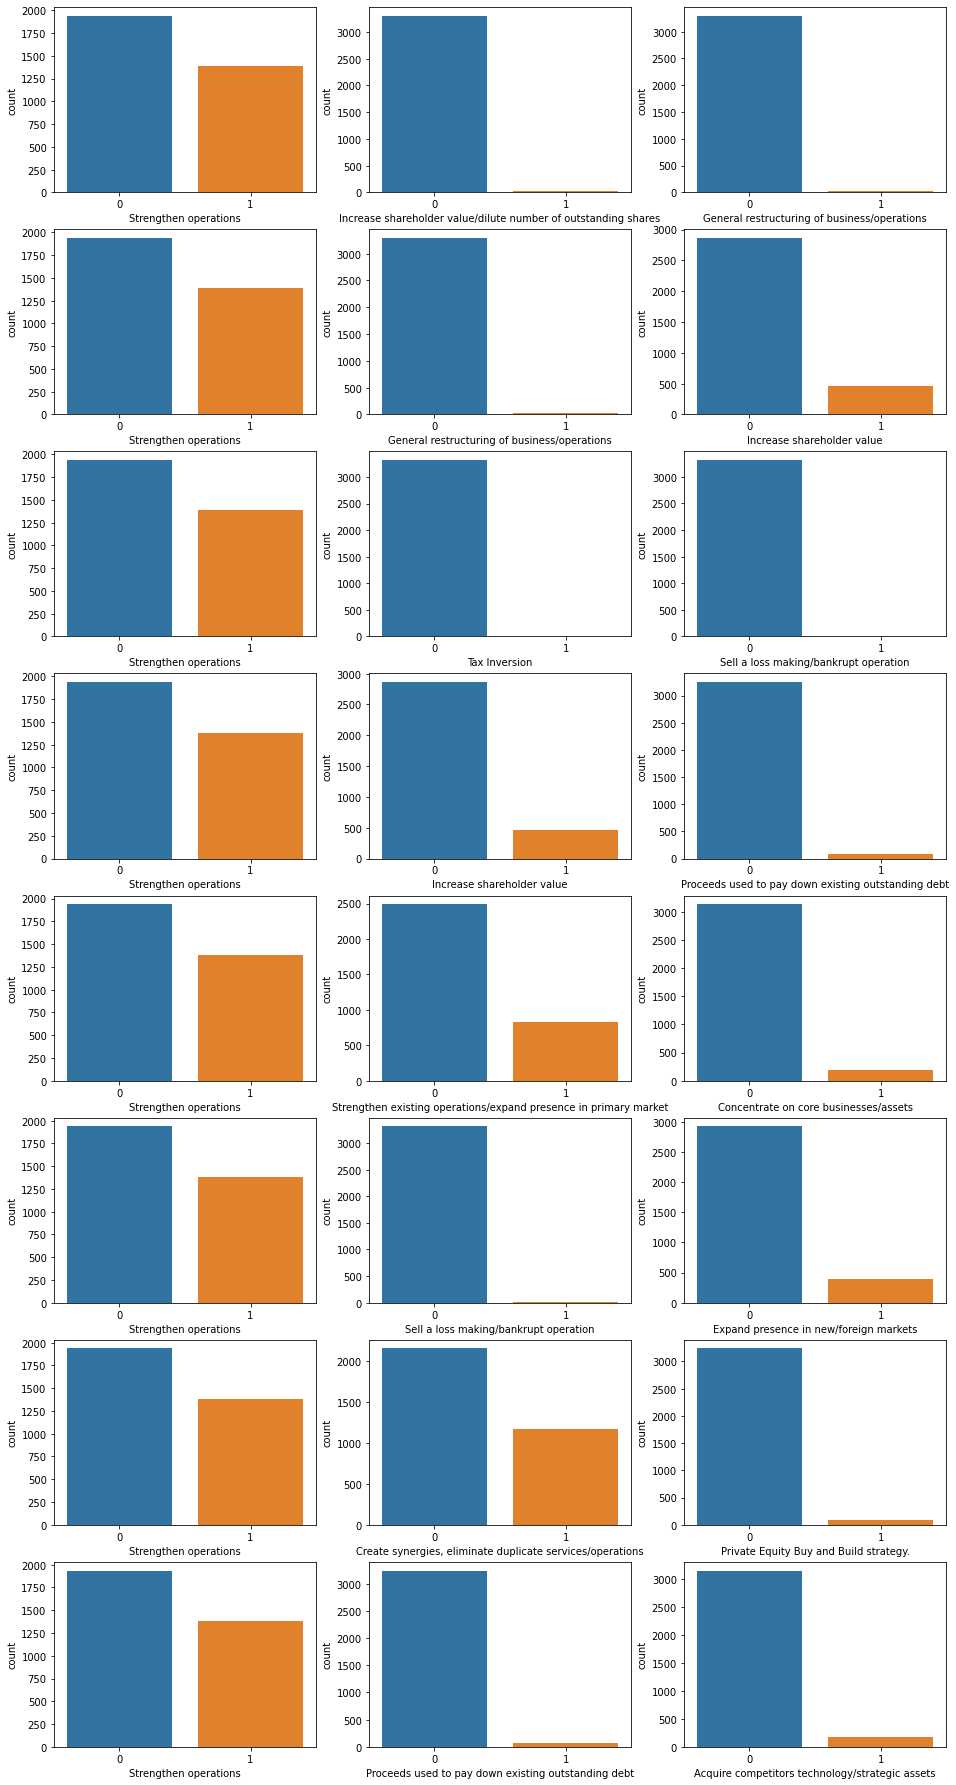

In [49]:
fig, axes = plt.subplots(8,3, figsize=(16, 32))

for x in range(8):
    for y in range(3):
        purpose = list(purposes_all)[x*y + y]
        sns.countplot(x=purp[purpose], ax=axes[x][y])

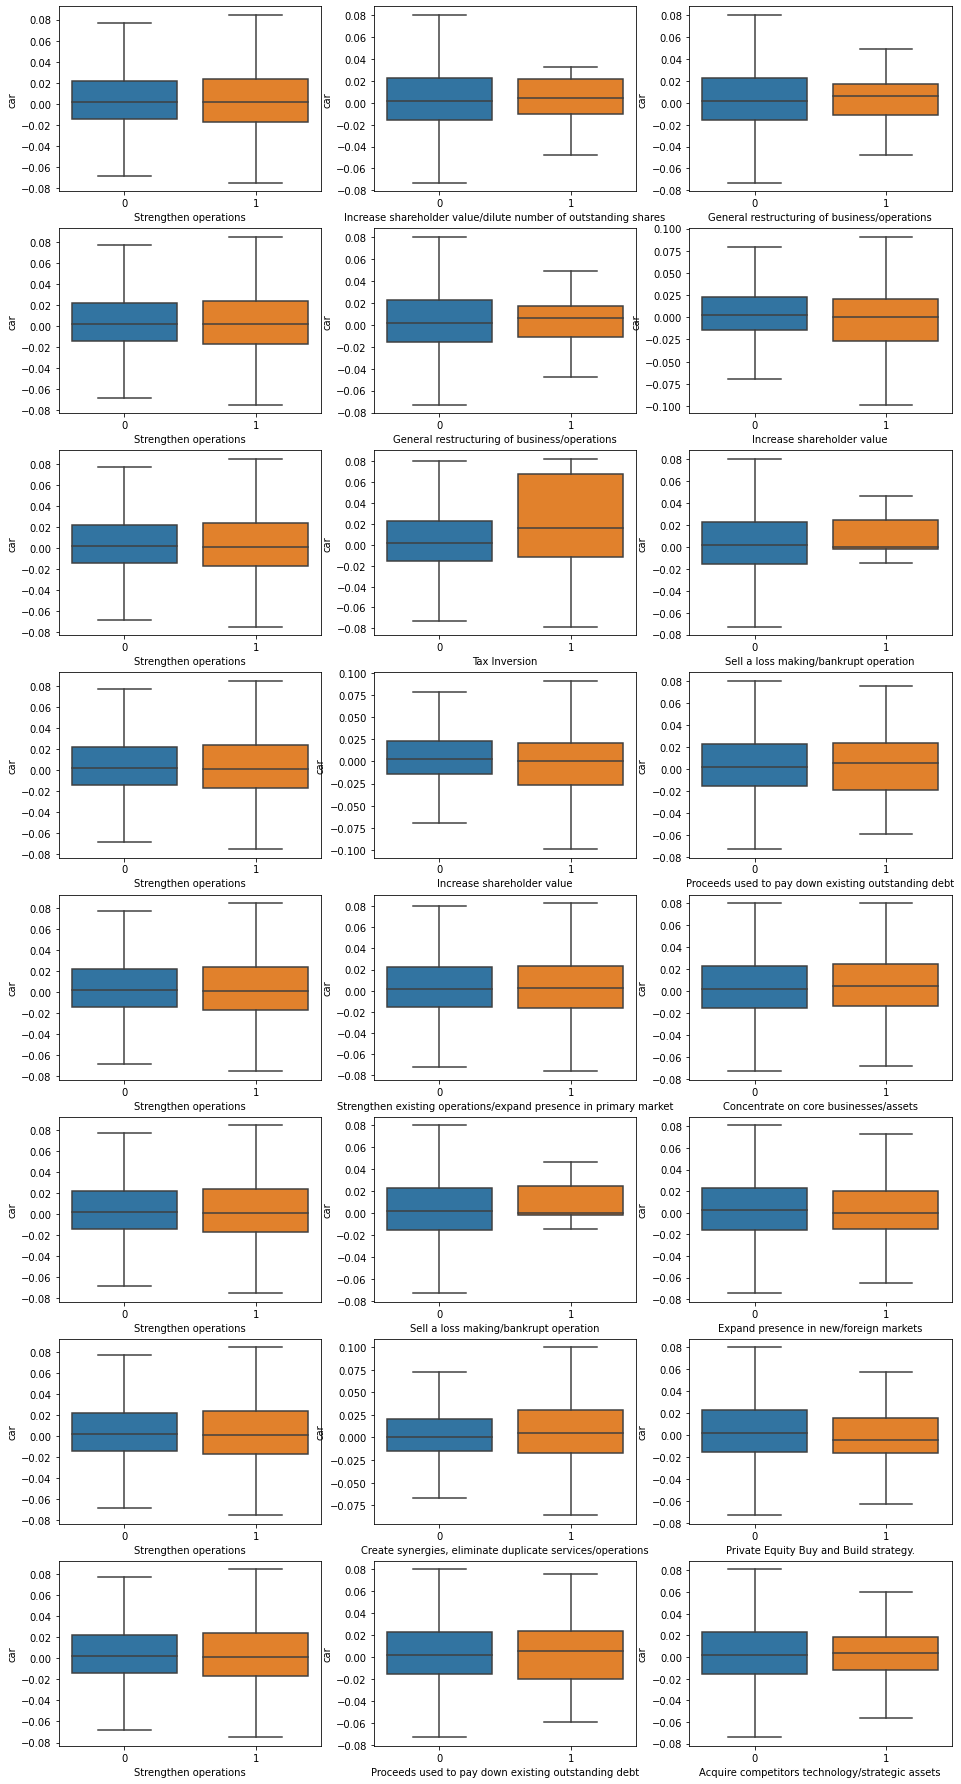

In [50]:
fig, axes = plt.subplots(8,3, figsize=(16, 32))

for x in range(8):
    for y in range(3):
        purpose = list(purposes_all)[x*y + y]
        sns.boxplot(data=purp, x=purpose, y='car',
                    showfliers=False,
                    ax=axes[x][y]
                   );

## Clustering

Based on McKinsey's research (https://www.mckinsey.com/business-functions/strategy-and-corporate-finance/our-insights/the-six-types-of-successful-acquisitions) it might makes sense to cluster deals based on purpose proposition being vague:
'An acquisition’s strategic rationale should be a specific articulation of one of these archetypes, not a vague concept like growth or strategic positioning, which may be important but must be translated into something more tangible')

# industry_relatedness (acquiror_code, target_code)

**Relatedness from top to bottom:**
1. Same industry (Iron & Steel)
2. Same industry group (Metals & Mining)
3. Same business sector (Mineral Resources)
4. Same economic sector (Basic Materials)
5. Not related

In [51]:
rel = data[['car']].copy()

In [52]:
# Transform codes

def relatedness(acquiror, target):
    if acquiror == target:
        return 'industry'
    elif acquiror[:6] == target[:6]:
        return 'industry_group'
    elif acquiror[:4] == target[:4]:
        return 'business_sector'
    elif acquiror[:2] == target[:2]:
        return 'economic_sector'
    else:
        return 'not_related'

In [53]:
rel['relatedness'] = data.apply(lambda row: relatedness(str(row.acquiror_code), str(row.target_code)), axis=1)

## Distribution

In [54]:
rel.relatedness.value_counts()

industry           1507
not_related         938
industry_group      340
business_sector     317
economic_sector     218
Name: relatedness, dtype: int64

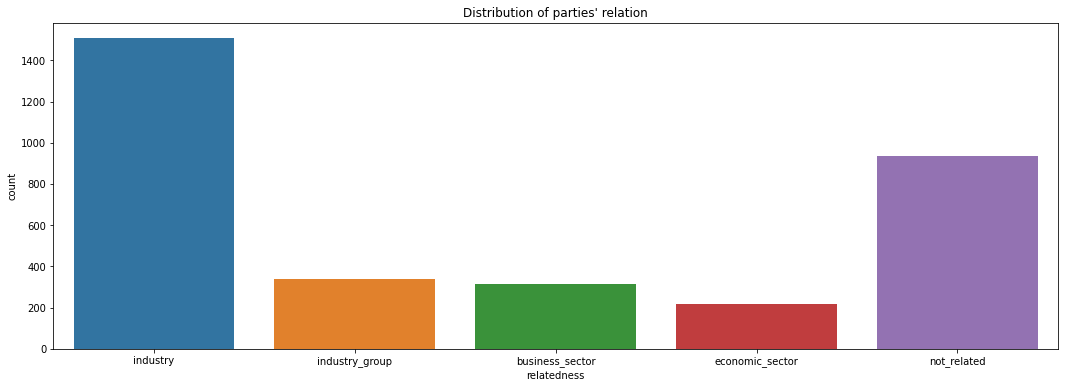

In [55]:
order = ['industry', 'industry_group', 'business_sector', 'economic_sector', 'not_related']

plt.figure(figsize=(18,6))
plt.title("Distribution of parties' relation")
sns.countplot(x=rel.relatedness, order=order);

## Impact on target

In [ ]:
sns.catplot(data=rel, x='relatedness', y='car', kind='box', order=order, showfliers=False, height=6, aspect=2);

# acquiror_industry

## Preprocessing

In [ ]:
# we can access information on industry on acquiror_id (8 digit code, 2 per level of classification)
print('example acquiror_code:', data.acquiror_code[0])

* 0-2 gives economic_sector
* 0-4 gives business_sector
* 0-6 gives industry_group
* 0-8 gives industry

In [ ]:
# transform code into different cols mentioned above
def declassifier(x):
    x = str(x)
    return x[:2], x[:4], x[:6], x

In [ ]:
tmp = data[['car']].copy()
tmp['economic_sector'], tmp['business_sector'], tmp['industry_group'], tmp['industry'] = \
zip(*data['acquiror_code'].map(declassifier))

In [ ]:
tmp

## economic_sector

### Distribution

In [ ]:
order = sorted(tmp.economic_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per economic_sector")
sns.countplot(x=tmp.economic_sector, order=order);

### Impact on target

In [ ]:
sns.catplot(data=tmp, x='economic_sector', y='car', kind='box', order=order, showfliers=False, height=6, aspect=2);

## business_sector

In [ ]:
print(tmp.business_sector.nunique()) # 29 sectors
tmp.business_sector.nunique() # 29 sectors

### Distribution

In [ ]:
sectors = sorted(tmp.business_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per business_sector")
sns.countplot(x=tmp.business_sector, order=sectors);

### Impact on target

In [ ]:
i = int(tmp.business_sector.nunique() / 3)
p1 = sectors[:i]
p2 = sectors[i: i + i]
p3 = sectors[i + i:]
tmp1 = tmp.loc[tmp['business_sector'].isin(p1)]
tmp2 = tmp.loc[tmp['business_sector'].isin(p2)]
tmp3 = tmp.loc[tmp['business_sector'].isin(p3)]
df = [tmp1, tmp2, tmp3]
order = [p1, p2, p3]

for df, order in zip(df, order):
    sns.catplot(data=df, x='business_sector', y='car',
                kind='box', order=order, showfliers=False, height=4, aspect=2).set(ylim=(-0.1, 0.1));

In [ ]:
# filtering out best performing industries
top = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).head(5).index
top_df = tmp.loc[tmp['business_sector'].isin(top)]
sns.catplot(data=top_df, x='business_sector', y='car',
            kind='box', showfliers=False, height=5, aspect=2
           ).set(title='Best performers measured by average CAR');
# print('top:', top_df.business_sector.value_counts()) # to count their occurence

# print('-------')

# filtering out worst performing industries
flop = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).tail(5).index
flop_df = tmp.loc[tmp['business_sector'].isin(flop)]
sns.catplot(data=flop_df, x='business_sector', y='car',
            kind='box', showfliers=False, height=5, aspect=2
           ).set(title='Worst performers measured by average CAR')
# print('flop:', flop_df.business_sector.value_counts()) # to count their occurence

## industry_group

In [ ]:
tmp.industry_group.nunique() # 55 sectors

In [ ]:
order = sorted(tmp.industry_group.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per industry_group")
sns.countplot(x=tmp.industry_group, order=order);

# target_industry

In [ ]:
tmp['economic_sector'], tmp['business_sector'], tmp['industry_group'], tmp['industry'] = \
zip(*data['target_code'].map(declassifier))

## economic_sector

### Distribution

In [ ]:
order = sorted(tmp.economic_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per economic_sector")
sns.countplot(x=tmp.economic_sector, order=order);

### Impact on target

In [ ]:
sns.catplot(data=tmp, x='economic_sector', y='car', kind='box', order=order, showfliers=False, height=6, aspect=2);

## business_sector

In [ ]:
print(tmp.business_sector.nunique()) # 29 sectors
tmp.business_sector.nunique() # 29 sectors

### Distribution

In [ ]:
sectors = sorted(tmp.business_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per business_sector")
sns.countplot(x=tmp.business_sector, order=sectors);

### Impact on target

In [ ]:
i = int(tmp.business_sector.nunique() / 3)
p1 = sectors[:i]
p2 = sectors[i: i + i]
p3 = sectors[i + i:]
tmp1 = tmp.loc[tmp['business_sector'].isin(p1)]
tmp2 = tmp.loc[tmp['business_sector'].isin(p2)]
tmp3 = tmp.loc[tmp['business_sector'].isin(p3)]
df = [tmp1, tmp2, tmp3]
order = [p1, p2, p3]

for df, order in zip(df, order):
    sns.catplot(data=df, x='business_sector', y='car',
                kind='box', order=order, showfliers=False, height=4, aspect=2).set(ylim=(-0.1, 0.1));

In [ ]:
# filtering out best performing industries
top = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).head(5).index
top_df = tmp.loc[tmp['business_sector'].isin(top)]
sns.catplot(data=top_df, x='business_sector', y='car',
            kind='box', showfliers=True, height=5, aspect=2
           ).set(title='Best performers measured by average CAR');
# print('top:', top_df.business_sector.value_counts()) # to count their occurence

# print('-------')

# filtering out worst performing industries
flop = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).tail(5).index
flop_df = tmp.loc[tmp['business_sector'].isin(flop)]
sns.catplot(data=flop_df, x='business_sector', y='car',
            kind='box', showfliers=True, height=5, aspect=2
           ).set(title='Worst performers measured by average CAR');
# print('flop:', flop_df.business_sector.value_counts()) # to count their occurence